# Training A Model

In [7]:
!refit_init

Refit Installed, You can now run the following to import REFIT
from refit import Refit


In [8]:
#Example Notebook
from sklearn.datasets import load_iris
import datetime
from refit import Refit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from refit.enums.model_format import ModelFormat
from skl2onnx.common.data_types import FloatTensorType, BooleanTensorType
from feature_extractor import FeatureExtractor

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [9]:
project_guid = "e2b6e5b3-cab6-47cc-a753-e655d3ac8ef0"
refit = Refit(project_guid)

start = datetime.datetime(2022, 1, 13, 0)
end = datetime.datetime(2022, 4, 11, 0)
sensors = ['divvy_station']

In [10]:
pd.set_option("display.max_columns", None)

In [12]:
# Getting Sensor Data with the training window flag incorporated
df = refit.sensor_data(
    start=start, 
    end=end, 
    sensors=sensors, 
    feature_extractor=None, 
    include_flag=False
)
df

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
feature_columns = ['month_TA1305000030',
 'week_TA1305000030',
 'day_TA1305000030',
 'hour_TA1305000030',
 'month_TA1306000010',
 'week_TA1306000010',
 'day_TA1306000010',
 'hour_TA1306000010',
 'month_TA1307000120',
 'week_TA1307000120',
 'day_TA1307000120',
 'hour_TA1307000120',
 'month_TA1307000126',
 'week_TA1307000126',
 'day_TA1307000126',
 'hour_TA1307000126']

In [26]:
feature_columns = ['month_ta1305000030',
 'week_ta1305000030',
 'day_ta1305000030',
 'hour_ta1305000030',
 'month_ta1306000010',
 'week_ta1306000010',
 'day_ta1306000010',
 'hour_ta1306000010',
 'month_ta1307000120',
 'week_ta1307000120',
 'day_ta1307000120',
 'hour_ta1307000120',
 'month_ta1307000126',
 'week_ta1307000126',
 'day_ta1307000126',
 'hour_ta1307000126']

MAE: 4.647921760391198


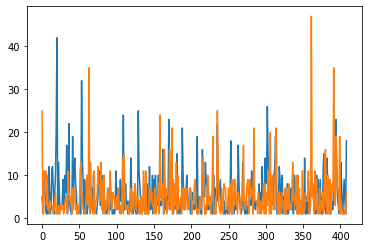

In [29]:
features = df
x = features[feature_columns][:2043]
features = pd.read_csv("features.csv")
y = features['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred
plt.plot(y_test.tolist())
plt.plot(y_pred)
print("MAE:",mean_absolute_error(y_test, y_pred))

In [30]:
initial_types = [('input', FloatTensorType([None,len(feature_columns)]))]

In [31]:
refit.save(clf, feature_columns, ModelFormat.SK_LEARN, initial_types=initial_types)

'Model Published'